데이터 다루기
===
## 1. 딥러닝과 데이터
* 데이터의 양보다 훨씬 중요한 것은 '필요한' 데이터가 얼마나 많은가임.   
  머신러닝 프로젝트의 성공과 실패는 얼마나 좋은 데이터를 가지고 시작하느냐에 영향을 많이 받음.   
  데이터가 우리가 사용하려는 머신러닝, 딥러닝에 얼마나 효율적으로 가공됐는지가 중요
* 여기서 좋은 데이터란 내가 알아내고자 하는 정보를 잘 담고 있는 데이터, 한쪽으로 치우치지 않고, 불필요한 정보를 가지고 있지 않으며, 왜곡되지 않은 데이터.
* 목적에 맞춰 가능한 한 많은 정보를 못았다면 이를 머신러닝과 딥러닝에서 사용할 수 있게 데이터 가공을 잘 해야 함.
## 2. 피마 인디언 데이터 분석
* 피마 인디언 당뇨병 예측 사례 : 당뇨가 유전 및 환경, 모두의 탓이라는 것을 증명하는 좋은 사례
* 데이터의 각 정보가 의미하는 의학, 생리학 배경 지식을 모두 알 필요는 없지만, 딥러닝을 구동하려면 반드시 속성과 클래스를 먼저 구분해야 함.
* 모델의 정확도를 향상시키기 위해서는 데이터의 추가 및 재가공이 필요할 수도 있음.
* 딥러닝의 구동에 앞서 데이터의 내용과 구조를 잘 파악하는 것이 중요.
## 3. pandas를 이용한 데이터 조사
* 데이터를 잘 파악하는 것이 딥러닝을 다루는 기술의 1단계.
* 데이터의 크기가 커지고 정보량이 많아지면 내용을 파악할 수 있는 효과적인 방법이 필요함. 이때 가장 유용한 방법이 데이터를 시각화해서 눈으로 직접 확인해 보는 것.

In [10]:
# pandas 라이브러리를 불러옴.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 피마 인디언 당뇨병 데이터셋을 불러옴. 불러올 때 각 칼럼에 해당하는 이름을 지정함.
df = pd.read_csv("csv_data\diabetes.csv")
df.columns = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"]

In [11]:
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 4. 데이터 가공
* 데이터를 잘 다루려면 데이터를 한 번 더 가공해야 함
* 이 프로젝트의 목적은 당뇨병 발병을 예측하는 것. 모든 정보는 당뇨병 발병과 어떤 관계가 있는지임.
* 임심 횟수 당 당뇨병 발병 확률의 경우 다음과 같이 계산할 수 있음.

In [14]:
df[["pregnant", "class"]] \
    .groupby(["pregnant"], as_index=False) \
        .mean().sort_values(by="pregnant", ascending=True)
# 2개 컬럼만 선택하여 \ pregnant 기준으로 그룹바이 \ 평균을 낸 뒤 pregnant 기준 오름차순 정렬

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


## 5. matplotlib을 이용한 그래프 표현
* 데이터를 그래프로 표현해서 그 성격을 파악하는 것이 중요.
* 상관 관계 있는지 분석.

<AxesSubplot:>

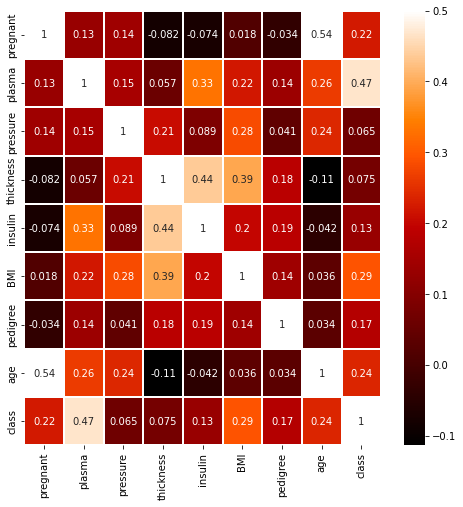

In [16]:
# 데이터 간의 상관관계를 그래프로 표현해 봄.
colormap = plt.cm.gist_heat
plt.figure(figsize=(8,8))

# 그래프의 속성을 결정함. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 함.
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor="white", annot=True)

* 두 항목이 전혀 다른 패턴으로 변화하고 있으면 0, 서로 비슷한 패턴으로 변할수록 1에 가까운 값 출력.
* 그래프를 통해 plasma 항목(공복 혈당 농도)이 class 항목과 가장 상관관계가 높다는 것 확인
* 즉, 이 항목이 결론을 만드는 데 가장 중요한 역할을 한다는 것을 예측할 수 있음.
* 이제 plasma와 class 항목만 따로 떼어 두 항목간의 관계를 그래프로 다시 한 번 확인.

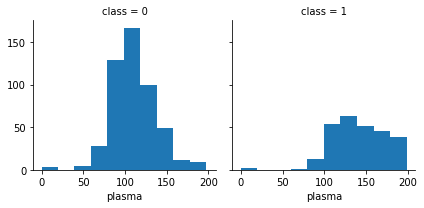

In [17]:
grid = sns.FacetGrid(df, col="class")
grid.map(plt.hist, "plasma", bins=10)
plt.show()
# 당뇨병 환자의 경우(class=1) plasma 수치가 150 이상이 많음.

* 데이터 전처리 과정은 모아진 데이터에 빠진 값이 있다면 평균이나 중앙값으로 대치하는 등의 과정, 전혀 관계없는 이상 데이터가 끼어 있지 않은지를 점검하는 과정 등이 포함됨. SVM, RF 등의 머신러닝 기법은 중요한 속성을 뽑아 내는 Feature extraction 과정도 데이터 전처리에 포함되지만, 딥러닝은 중요한 속성을 내부적으로 뽑아내므로 이 과정은 필요 없음.

## 6. 피마 인디언의 당뇨병 예측 실행

In [20]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옴.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옴.
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분.
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 불러옴.
dataset = df.values
X = dataset[:,0:8]
Y = dataset[:,8]

# 모델을 설정함.
model = Sequential()
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# 모델 컴파일.
model.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

# 모델 실행.
model.fit(X, Y, epochs=200, batch_size=10)

# 결과를 출력함.
print(f"\n Accuracy : {model.evaluate(X, Y)[1]:.4f}")

Epoch 1/200
77/77 [==============================] - 0s 606us/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 657us/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 639us/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 672us/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 707us/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 684us/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 645us/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 685us/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 630us/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 673us/step - loss: 0.6656 - accur

## 7. 교차 엔트로피
* 교차 엔트로피는 2개의 확률분포 간의 거리를 측정한 것.
* 교차 엔트로피는 2개의 확률분포 p, q에 대해서 다음과 같이 정의됨.
$$H(p,q)=-\displaystyle\sum_xp(x)\log_n{q(x)}$$
* 교차 엔트로피가 크면, 2개의 확률 분포가 많이 다른 것. 교차 엔트로피가 작으면 2개의 확률 분포가 거의 일치한다고 볼 수 있음.
  * 예시)   
    목표 출력 L(one-hot 인코딩) → 교차 엔트로피 함수 ← 실제 출력 S(소프트 맥스 함수 출력)